# Name: Yashasvi Baneswar Mishra
# Employee ID: 15780
# Project: Black Friday Sales Prediction


### Import Libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (excel)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # visualization

### Import dataset

In [2]:
sales = pd.read_csv("train.csv") # read the data
test = pd.read_csv('test.csv') # read the data
sales.head() # show the first 5 rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
test.head() # show the first 5 rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
#for submission

submission = pd.DataFrame() # create a dataframe
submission['Purchase'] = [] # create a column
submission['User_ID'] = test['User_ID'] # create a column
submission['Product_ID'] = test['Product_ID'] # create a column

### Data exploration

In [5]:
sales.shape # show the shape of the dataframe

(550068, 12)

In [6]:
sales.info() # show the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Looking at the data, we can conclude that our set possesses 12 different parameters: 7 numerical (integer and float) and 5 object variables.

Looking into the summary statistics for these 7numercal features

In [7]:
sales.describe() # show the descriptive statistics of the dataframe

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


There are 12 features, looking into each of these features:
    
1. User ID: Each user has been provided a unique ID. Lets see how many unique users we have in our dataset 

In [8]:
sales.User_ID.nunique() # show the number of unique values in the column

5891

There are 5891 unique users in our dataset and none of the value in this feature is null

2. Product_ID: Each product that is available for sales has a specific/ unique product id associated with it. Lets look into the number of unique products available for sale.

In [9]:
sales.Product_ID.nunique() # show the number of unique values in the column

3631

So there are a total of 3631 products available for sales.

3. Gender: Gender is a categorical variables with 2 categries: Male(M) and Female(F).

In [10]:
sales.Gender.value_counts(normalize=True)*100 #                     

M    75.310507
F    24.689493
Name: Gender, dtype: float64

There are no null values in this feature and Males constitute 75% of the data.

4. Age: Age is again a categorical data with age divide in particular range.

In [11]:
sales.Age.value_counts() #                                               

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

The age is divide in 7 categories i.e 0-17,18-25,26-35,36-45,46-50,51-55,55+ . The bins size here is varing.

5. Occupation: The Occupation number is the ID number of occupation type of each customer. We can see that around 21 different occupations exist.

In [12]:
sales.Occupation.nunique()  #                  

21

6. City_Category : The city has been categorised into 3 categories i.e A,B,C.

In [13]:
sales.City_Category.value_counts() #             

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

7. Stay_In_Current_City_Years : This depects the numbers of year from which a person is residing in that particular city. It has been divided into 5 categories 

In [14]:
sales.Stay_In_Current_City_Years.value_counts() #                

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

8. Marital_Status: This features shows if a person is married or not.

In [15]:
sales.Marital_Status.value_counts() #               

0    324731
1    225337
Name: Marital_Status, dtype: int64

The products have been categorised into three categories with represent three different features:
    
9. Product_Category_1 
    
10. Product_Category_2 
    
11. Product_Category_3

12. Purchase: This is our final targetfeature which is our dependent variable and it is also the variable whose value we wish to predict, the purchase amount incured by the people shopping on black friday. As It always tends to be a contionous variable so this question automatically becomes that of a regression.


### Missing data

In [16]:
# lets combine the data for data prep

test['Purchase']=np.nan # create a column
sales['data']='train' # create a column
test['data']='test' # create a column
test=test[sales.columns] # merge the dataframes
combined=pd.concat([sales,test],axis=0) # combine the dataframes

In [17]:
combined.head() # show the first 5 rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [18]:
sales.isna().sum().sort_values(ascending=False) # show the number of missing values in each column

Product_Category_3            383247
Product_Category_2            173638
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
data                               0
dtype: int64

Here we can see that there are 2 features which contain the missing values i.e Product_Category_2 and Product_Category_3.

In [19]:
#percent of missing data relevant to all data
percent = (sales.isnull().sum()/sales.isnull().count()).sort_values(ascending=False) # show the number of missing values in each column
percent[[0,1]] # show the number of missing values in each column

Product_Category_3    0.696727
Product_Category_2    0.315666
dtype: float64

The feature Product_Category_3 has 70% data missing so imputing this much data is not feasible , so it is better to drop this feature

In [20]:
combined.drop('Product_Category_3',axis=1,inplace=True) # drop the column

The feature Product_Category_2 has 30% data missing so we can impute values into this using an appromiate method.

In [21]:
combined.Product_Category_2.value_counts() # show the number of unique values in the column

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

These are almost 18 categories in which these Product_Category_2 is divided ,imputing the mean value does make sense because that gives a decimal term 9.8 which is not a product category here. So, there are 2 possible ways median or mode.

In [22]:
#imputed missing values with random values in the same probability distribution as given feature already had

vc = combined.Product_Category_2.value_counts(normalize = True) # show the number of unique values in the column
miss = combined.Product_Category_2.isna() # show the number of missing values in the column
combined.loc[miss, 'Product_Category_2'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values) # impute the missing values

In [23]:
combined.Product_Category_2.value_counts() # show the number of unique values in the column

8.0     133192
14.0    115278
2.0     102739
16.0     89859
15.0     78757
5.0      54035
4.0      53486
6.0      34381
11.0     29393
17.0     27743
13.0     21898
9.0      11969
12.0     11370
10.0      6448
3.0       6021
18.0      5851
7.0       1247
Name: Product_Category_2, dtype: int64

In [24]:
combined.isna().sum() # show the number of missing values in each column

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
data                               0
dtype: int64

There are no null values left in the data set.The purchase null values are because of the test data that needs to be predicted

### Exploratory Data Analysis

In [25]:
#using the train data part from combined dataset for eda

sales_1 = combined[combined['data']=='train'] # create a dataframe

#### Univariate Analysis:

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


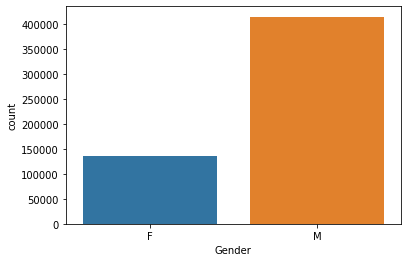

In [26]:
sns.countplot(sales_1['Gender']) #           
plt.show() #                 

The graph shows that there are almost 3 times more male customers than female customers.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


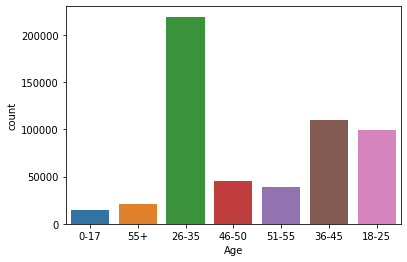

In [27]:
sns.countplot(sales_1['Age']) #           
plt.show() #            

The graph shows that the majority of the customers that purchase things during the sales season mainly belong to the age group of 26-35 and 36-45.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


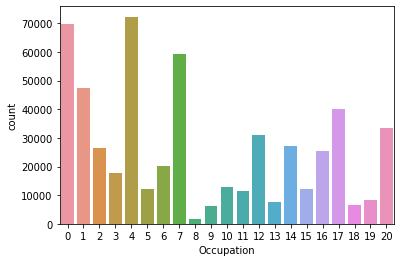

In [28]:
sns.countplot(sales_1['Occupation']) #      
plt.show() #         

The graph shows that top three Occupations with the majority of buyers is 4,0,7.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


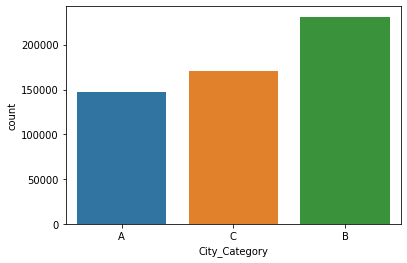

In [29]:
sns.countplot(sales_1['City_Category']) #             
plt.show() #        

The graph shows that people from city B buy majorly during the sale  

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


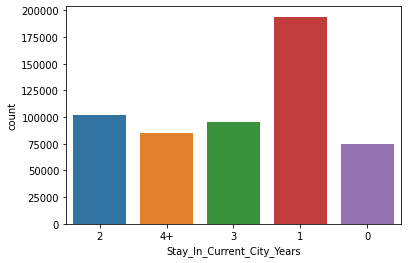

In [30]:
sns.countplot(sales_1['Stay_In_Current_City_Years']) #                    
plt.show()#             

The graph shows that majority people buying during sales have lived in the current city for an year.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


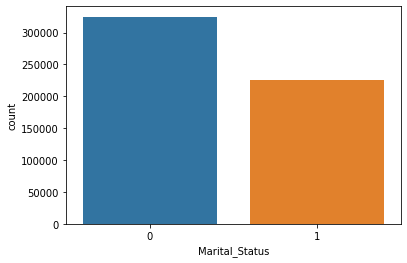

In [31]:
sns.countplot(sales_1['Marital_Status']) #                
plt.show() #                 

The graphs shows that single people tend to buy more things during sales.

#### Bivariate Analysis / Multivariate Analysis:

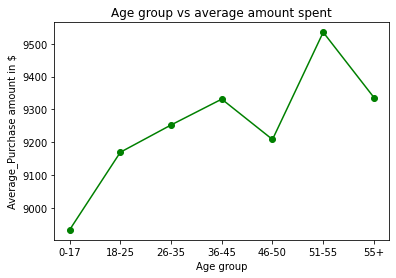

In [32]:
# Avearge amount spend by different age groups

data = sales_1.groupby('Age')['Purchase'].mean() #                 
plt.plot(data.index,data.values,marker='o',color='g') #                
plt.xlabel('Age group'); #          
plt.ylabel('Average_Purchase amount in $'); #                         
plt.title('Age group vs average amount spent'); #            
plt.show()#              

The average amount spend by age group 51-55 is most during the festive season sales.

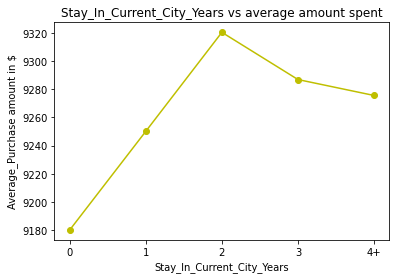

In [33]:
# Avearge amount spend based on the time of stay in the current city

data = sales_1.groupby('Stay_In_Current_City_Years')['Purchase'].mean() #           
plt.plot(data.index,data.values,marker='o',color='y') #         
plt.xlabel('Stay_In_Current_City_Years'); #           
plt.ylabel('Average_Purchase amount in $'); #          
plt.title('Stay_In_Current_City_Years vs average amount spent'); #           
plt.show() #         

The people who have been living in the current city for 2 or more years are on an average spending more amount in the black friday sales

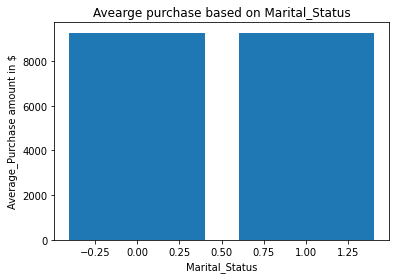

In [34]:
# Avearge purchase based on Marital_Status

data = sales_1.groupby('Marital_Status')['Purchase'].mean() #               
plt.bar(data.index,data.values) #              
plt.xlabel('Marital_Status'); #             
plt.ylabel('Average_Purchase amount in $'); #               
plt.title('Avearge purchase based on Marital_Status'); #             
plt.show() #              

Purchasers who married or not, have almost same average of purchase.

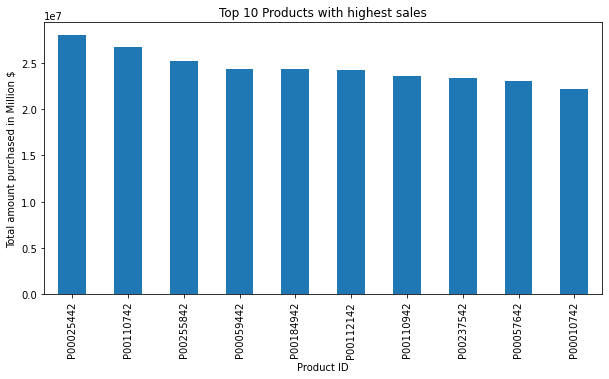

In [35]:
# Top 10 products which made the highest sales

data = sales_1.groupby("Product_ID").sum()['Purchase'] #  how many times each product was purchased

plt.figure(figsize=(10,5)) #  create a figure
data.sort_values(ascending=False)[0:10].plot(kind='bar') #  plot the data
plt.xticks(rotation=90) # rotate the x-axis labels
plt.xlabel('Product ID') #  label the x-axis
plt.ylabel('Total amount purchased in Million $') #  label the y-axis
plt.title('Top 10 Products with highest sales') #  title the plot
plt.show() #  show the plot

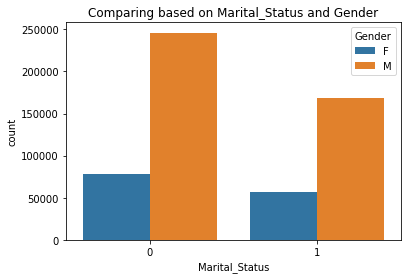

In [36]:
#comparing based on Marital_Status and Gender

sns.countplot(x='Marital_Status',data=sales_1,hue='Gender') #             
plt.title('Comparing based on Marital_Status and Gender') #                 
plt.show() #                

Males tend to purchase more and Unmarried Males are around 45% in the data and they show to purchase 9000$ on average.

Products that are most purchased by each of the age group:

In [37]:
a =pd.crosstab(sales_1['Age'],sales_1['Product_ID']) #         
a.idxmax(axis=1) #           

Age
0-17     P00255842
18-25    P00265242
26-35    P00265242
36-45    P00025442
46-50    P00265242
51-55    P00265242
55+      P00265242
dtype: object

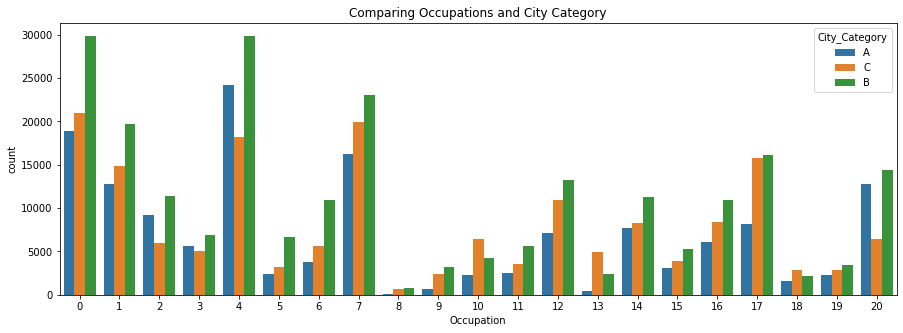

In [38]:
#Occupations and City Category

plt.figure(figsize=(15,5)) #           
sns.countplot(x='Occupation',data=sales_1,hue='City_Category' )#          
plt.title('Comparing Occupations and City Category') #               
plt.show() #                

People from Occupation 4,0,7 are buying the most and most of the people from these occupations belong to City_Category B.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


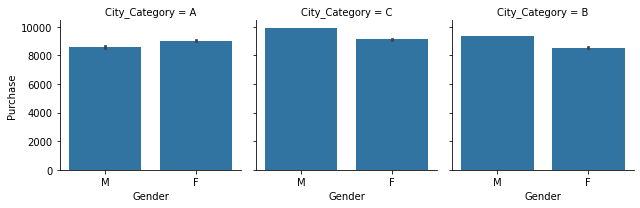

In [39]:
#the purchase habits of different genders across the different city categories.

g = sns.FacetGrid(sales_1,col="City_Category") #                   
g.map(sns.barplot, "Gender", "Purchase") #              
plt.show() #              

For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where Females tend to puchase more than men.

### Data preprocessing.

In [40]:
# for datapreprocessing again working with the combined dataset
combined.head() #            

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,7969.0,train


1. User_ID and Product_ID: 

In [41]:
# User_ID data preprocess. e.g. 1000002 -> 2

combined['User_ID'] = combined['User_ID'] - 1000000 #           
 
# Product_ID preprocess e.g. P00069042 -> 69042

combined['Product_ID'] = combined['Product_ID'].str.replace('P00', '') #             

#object to int
combined['Product_ID'] = pd.to_numeric(combined['Product_ID'],errors='coerce') #              

In [42]:
combined.info() #  show the info of the dataframe 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  data                        783667 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 77.7+ MB


2. Product_Category_2 :

All the unique values in product category 2 are integers. But the data type shown in info is float so we can change it by converting the numbers in float to integers.

In [43]:
combined.Product_Category_2 = combined.Product_Category_2.astype('int64') #         

In [44]:
# features with datatype object

cat_cols = combined.select_dtypes(['object']).columns #         
cat_cols #            

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'data'], dtype='object')

3. Stay_In_Current_City_Years

For Stay in current city years we need to convert the object datatype to int.
It contains a category which has '4+' that needs to be altered.

In [45]:
# 4+ to 4
combined['Stay_In_Current_City_Years'] =np.where(combined['Stay_In_Current_City_Years'].str[:2]=="4+",4,combined['Stay_In_Current_City_Years']) #                     

#object to int
combined['Stay_In_Current_City_Years'] = pd.to_numeric(combined['Stay_In_Current_City_Years'],errors='coerce') #                  

4. Gender: 

    Gender 'F' for female are represented by the value fo 0.

    Gender 'M' for male are represented by the value fo 1.

In [46]:
combined['Gender'] = combined['Gender'].map({'F':0, 'M':1}).astype(int) #                   

5. Age

In [47]:
# Modify age column

combined['Age'] = combined['Age'].map({'0-17': 9, 
                               '18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})#               
combined['Age'].value_counts()#      

31    313015
42    156724
22    141953
48     65278
53     54784
60     30579
9      21334
Name: Age, dtype: int64

6. City_Category : dummy variables for this feature

In [48]:
combined = pd.get_dummies(combined,columns=['City_Category'],drop_first = True)#       object to int

In [49]:
combined.head()#       how many missing values in each column

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,8,8370.0,train,0,0
1,1,248942,0,9,10,2,0,1,6,15200.0,train,0,0
2,1,87842,0,9,10,2,0,12,8,1422.0,train,0,0
3,1,85442,0,9,10,2,0,12,14,1057.0,train,0,0
4,2,285442,1,60,16,4,0,8,8,7969.0,train,0,1


In [50]:
combined.info()#       show the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  int32  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  data                        783667 non-null  object 
 11  City_Category_B             783667 non-null  uint8  
 12  City_Category_C             783667 non-null  uint8  
dtypes: float64(1),

In [51]:
combined.head()#      how many missing values in each column

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,8,8370.0,train,0,0
1,1,248942,0,9,10,2,0,1,6,15200.0,train,0,0
2,1,87842,0,9,10,2,0,12,8,1422.0,train,0,0
3,1,85442,0,9,10,2,0,12,14,1057.0,train,0,0
4,2,285442,1,60,16,4,0,8,8,7969.0,train,0,1


In [52]:
#splitting the data back into train and test as it was already provided

sales = combined[combined['data']=='train']#       splitting the data back into train and test as it was already provided
del sales['data']#     deleting the data column
test_input = combined[combined['data']=='test'] #     splitting the data back into train and test as it was already provided
test_input.drop(['Purchase','data'],axis=1,inplace=True) #    deleting the data column

del combined#     deleting the dataframe

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20072\3930403037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_input.drop(['Purchase','data'],axis=1,inplace=True) #    deleting the data column


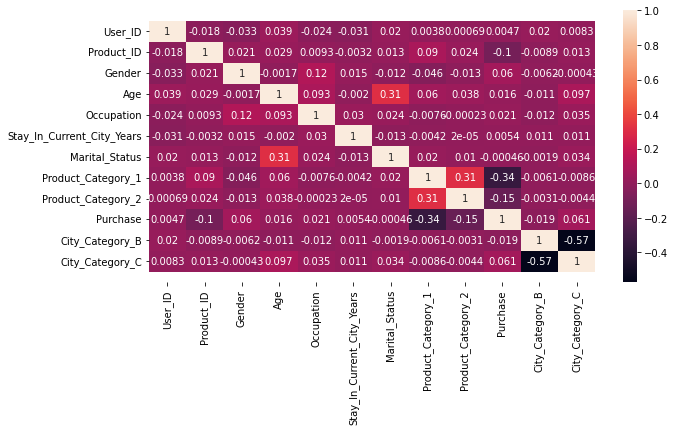

In [53]:
#Heatmap to show the correlation between various variables of the train data set

plt.figure(figsize=(10, 5)) #    create a figure
cor = sales.corr() #  calculate the correlation between various variables of the train data set
ax = sns.heatmap(cor,annot=True) # plot the correlation between various variables of the train data set
bottom, top = ax.get_ylim() #  get the y-axis limits
ax.set_ylim(bottom + 0.5, top - 0.5) #  set the y-axis limits
plt.show() #  show the plot

The variables which show a significant correlation in the data are:

1. Marital_status and Age
2. Product_Category_1 and Purchase
3. City_Category_B and City_category_A

### Model building

In [54]:
#splitting the data into X and y
X = sales.drop('Purchase',axis=1)#    splitting the data into X and y
y = sales['Purchase']#  splitting the data into X and y

#train test split for model building
from sklearn.model_selection import train_test_split#   splitting the data into X and y

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)#  splitting the data into X and y

LinearRegression :
    
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.



In [55]:
#Linear regression

from sklearn.linear_model import LinearRegression# 

lr = LinearRegression() #   create a linear regression object
lr.fit(X_train,y_train) # training the algorithm

# Getting the coefficients and intercept

print('coefficients:\n', lr.coef_)# coefficients
print('\n intercept:', lr.intercept_)# intercept is the y-intercept of the line

coefficients:
 [ 1.49710361e-02 -3.70667230e-03  5.34757894e+02  1.49757162e+01
  6.79871604e+00  1.27133575e+01 -6.01777374e+01 -4.10696320e+02
 -4.69673684e+01  1.78839940e+02  6.99533632e+02]

 intercept: 11271.008419786896


In [56]:
#Predicting on the test data

y_pred = lr.predict(X_test) # predicting the test data

from sklearn import metrics #   importing the metrics module

print('r2_score:', metrics.r2_score(y_test,y_pred)) # r2_score: 0.988
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred))) #  rmse: 0.049

r2_score: 0.13214603175103334
rmse: 4685.229424381709


The score generated with the Linear Regression model was very low so used Regularized Linear model i.e Ridge Regression

Ridge Regression: This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression 

In [57]:
# Ridge Regression

from sklearn.linear_model import Ridge# Ridge Regression

RR = Ridge(alpha=0.05,normalize=True)#alpha is the regularization parameter
RR.fit(X_train, y_train)# training the algorithm

y_pred = RR.predict(X_test)# predicting on the test data

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))# rmse: 0.049

rmse: 4685.794039688766


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Linear Regressiom models were not giving that much improvement so tried non linear regression models.

Decision Tree: 

In [58]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor# Import Decision Tree Regressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

DT.fit(X_train, y_train)# training the algorithm

y_pred = DT.predict(X_test)# predicting on the test data

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))# Random Forest Model

rmse: 2738.138003573551


In [59]:
#Decision Tree 2

DT2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

DT2.fit(X_train, y_train)# training the algorithm

y_pred = DT2.predict(X_test)# Predicting the test set results

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#Decision Tree 3

rmse: 2884.8079395481413


Random Forest Regressor: 

Random Forest is an ensemble machine learning algorithm that follows the bagging technique. The base estimators in random forest are decision trees.It randomly selects a set of features which are used to decide the best split at each node of the decision tree.

In [60]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 3,max_depth=10,n_estimators=25)

rf.fit(X_train,y_train)# training the algorithm

y_pred = rf.predict(X_test)#predicting on the test data

print('r2_score:', metrics.r2_score(y_test,y_pred))# r2_score: 0.988
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))# Random Forest Model

r2_score: 0.6909271760572122
rmse: 2796.0050109526596


In [61]:
# another random forest

from sklearn.ensemble import RandomForestRegressor

rf3 = RandomForestRegressor(random_state=3,max_depth=10,min_samples_split=500,oob_score=True)


rf3.fit(X_train,y_train)# training the algorithm

y_pred = rf3.predict(X_test)# predicting on the test data

print('r2_score:', metrics.r2_score(y_test,y_pred)) # 0.8
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))# another random forest

r2_score: 0.6884072865144298
rmse: 2807.3798725385304


In [62]:
# random forest 4

rf4 = RandomForestRegressor(n_estimators=30,random_state=3,max_depth=15,min_samples_split=100,oob_score=True)


rf4.fit(X_train,y_train)# training the algorithm

y_pred = rf4.predict(X_test)# Predicting the Test set results

print('r2_score:', metrics.r2_score(y_test,y_pred)) # 0.8
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))# random forest 5

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


r2_score: 0.7126036835698684
rmse: 2696.1753513576036


ExtraTreesRegressor : 

The main difference between random forests and extra trees (usually called extreme random forests) lies in the fact that, instead of computing the locally optimal feature/split combination (for the random forest), for each feature under consideration, a random value is selected for the split (for the extra trees).

In [63]:
#Fitting the model
from sklearn.ensemble import ExtraTreesRegressor

rf = ExtraTreesRegressor()

rf.fit(X_train,y_train)# training the algorithm

y_pred = rf.predict(X_test)# Predicting the Test set results

print('r2_score:', metrics.r2_score(y_test,y_pred)) # 0.9
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#Fitting the model

r2_score: 0.6816184933929769
rmse: 2837.797828556684


XG BRegressor :
    
XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

In [64]:
#XGBoost Model1
from xgboost import XGBRegressor


xgb1 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

xgb1.fit(X_train,y_train)# training the algorithm

y_pred = xgb1.predict(X_test)# Predicting the Test set results

print('r2_score:', metrics.r2_score(y_test,y_pred)) # 0.898
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#XGBoost Model2

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2_score: 0.7366238182176579
rmse: 2581.046233227019


In [65]:
## XGBoost2
from xgboost import XGBRegressor

xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X_train,y_train)# training the algorithm

y_pred = xgb2.predict(X_test)# Predicting the test set results

print('r2_score:', metrics.r2_score(y_test,y_pred)) # 0.898
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#XGBoost3

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2_score: 0.7484091010869938
rmse: 2522.638378850801


In [66]:
## XGBoost3

xgb3 = XGBRegressor(n_estimators=6,max_depth=500)

xgb3.fit(X_train,y_train)# training the algorithm

y_pred = xgb3.predict(X_test)#y_test

print('r2_score:', metrics.r2_score(y_test,y_pred)) # 0.988
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#XGBoost4

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2_score: 0.6235617564626654
rmse: 3085.7050016141607


In [67]:
#XGBoost4

xgb4 = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb4.fit(X_train,y_train)# training the algorithm

y_pred = xgb4.predict(X_test)#y_test is the actual values

print('r2_score:', metrics.r2_score(y_test,y_pred)) # 0.988
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred))) # rmse: 0.0

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2_score: 0.7343067392041509
rmse: 2592.3748812342233


In [68]:
#XGBoost5
from xgboost import XGBRegressor

xgb5 = XGBRegressor(n_estimators=450,max_depth=8,learning_rate=0.076)#0.076

xgb5.fit(X_train,y_train)#  fit the model to the training data

y_pred = xgb5.predict(X_test)#y_test

print('r2_score:', metrics.r2_score(y_test,y_pred)) # 0.988
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#XGBoost6

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2_score: 0.7447748526776927
rmse: 2540.7928983855


In [69]:
#XGBoost6
from xgboost import XGBRegressor#XGBoost7
#
xgb6 = XGBRegressor(n_estimators=470,max_depth=9,learning_rate=0.06)#0.06

xgb6.fit(X_train,y_train)#XGBoost7

y_pred = xgb6.predict(X_test)#XGBoost7

print('r2_score:', metrics.r2_score(y_test,y_pred)) #0.9
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#XGBoost7

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2_score: 0.7469490561067368
rmse: 2529.9475410345244


Light GBM:

From our notebook so far, it feels like both of the algorithms perform pretty well in their own right. LightGBM is significantly faster than XGBoost but delivers almost equivalent performanceLight GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern

In [70]:

from lightgbm import LGBMRegressor#LightGBM

lgbm1 = LGBMRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

lgbm1.fit(X_train,y_train)

y_pred = lgbm1.predict(X_test)# y_test is the actual values

print('r2_score:', metrics.r2_score(y_test,y_pred)) #0.988
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred))) # 0.065

r2_score: 0.712258633859667
rmse: 2697.7933878505837


### Conclusion & Inference

Having seen and comapared all the existing and suitable models for such kind of datasets, we come to the conclusion that the XGBRegressor model is the model that gives the optimum results in regards to our dataset

Parameters & scoring: 
XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)
r2_score: 0.7492767237638949
rmse: 2518.284905633662



In [71]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # creating a dataframe
df1 = df.head(25)#.plot(kind='bar',figsize=(16,10))
df1.head() # top 25 rows

,Actual,Predicted
41001,15228.0,13529.119905
16151,1088.0,1769.768174
507262,16426.0,15424.628041
368698,12042.0,17340.546623
353782,8699.0,6347.730479


In [72]:
# Feature Importance

imp = pd.DataFrame(xgb2.feature_importances_,index=X.columns,columns=['importance']) # xgb2 is the model
imp.sort_values(by='importance',ascending=False) # sort the values in the dataframe by importance in descending order

,importance
Product_Category_1,0.847022
Product_ID,0.027609
City_Category_C,0.025543
Product_Category_2,0.014973
User_ID,0.013642
Age,0.012366
Occupation,0.012361
City_Category_B,0.011903
Gender,0.011603
Stay_In_Current_City_Years,0.011590


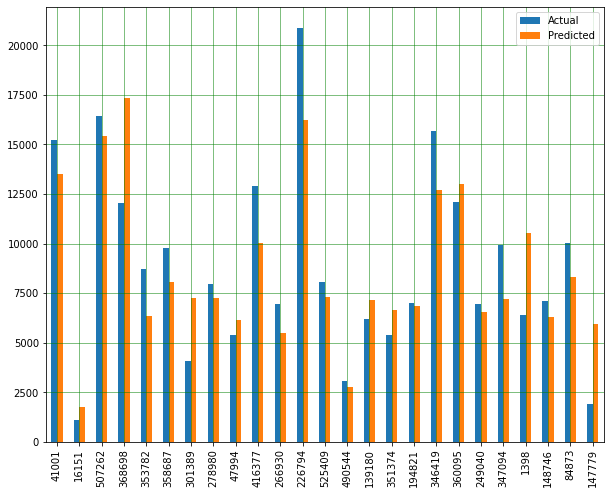

In [73]:
df1.plot(kind='bar',figsize=(10,8))#,width=1)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')#, axis='y')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') # minor grid
plt.show() # to display the plot

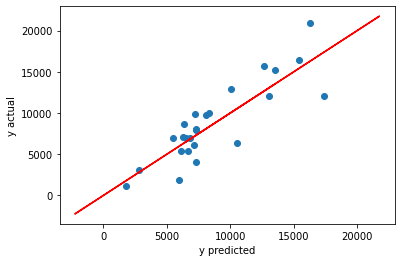

In [74]:
plt.scatter(df1.Predicted,df1.Actual) # Scatter plot
plt.plot(y_pred,y_pred,'r')#,y_pred,y_pred,'r')
plt.xlabel('y predicted')# x-axis label
plt.ylabel('y actual') # y_test
plt.show()# Plotting the actual vs predicted values

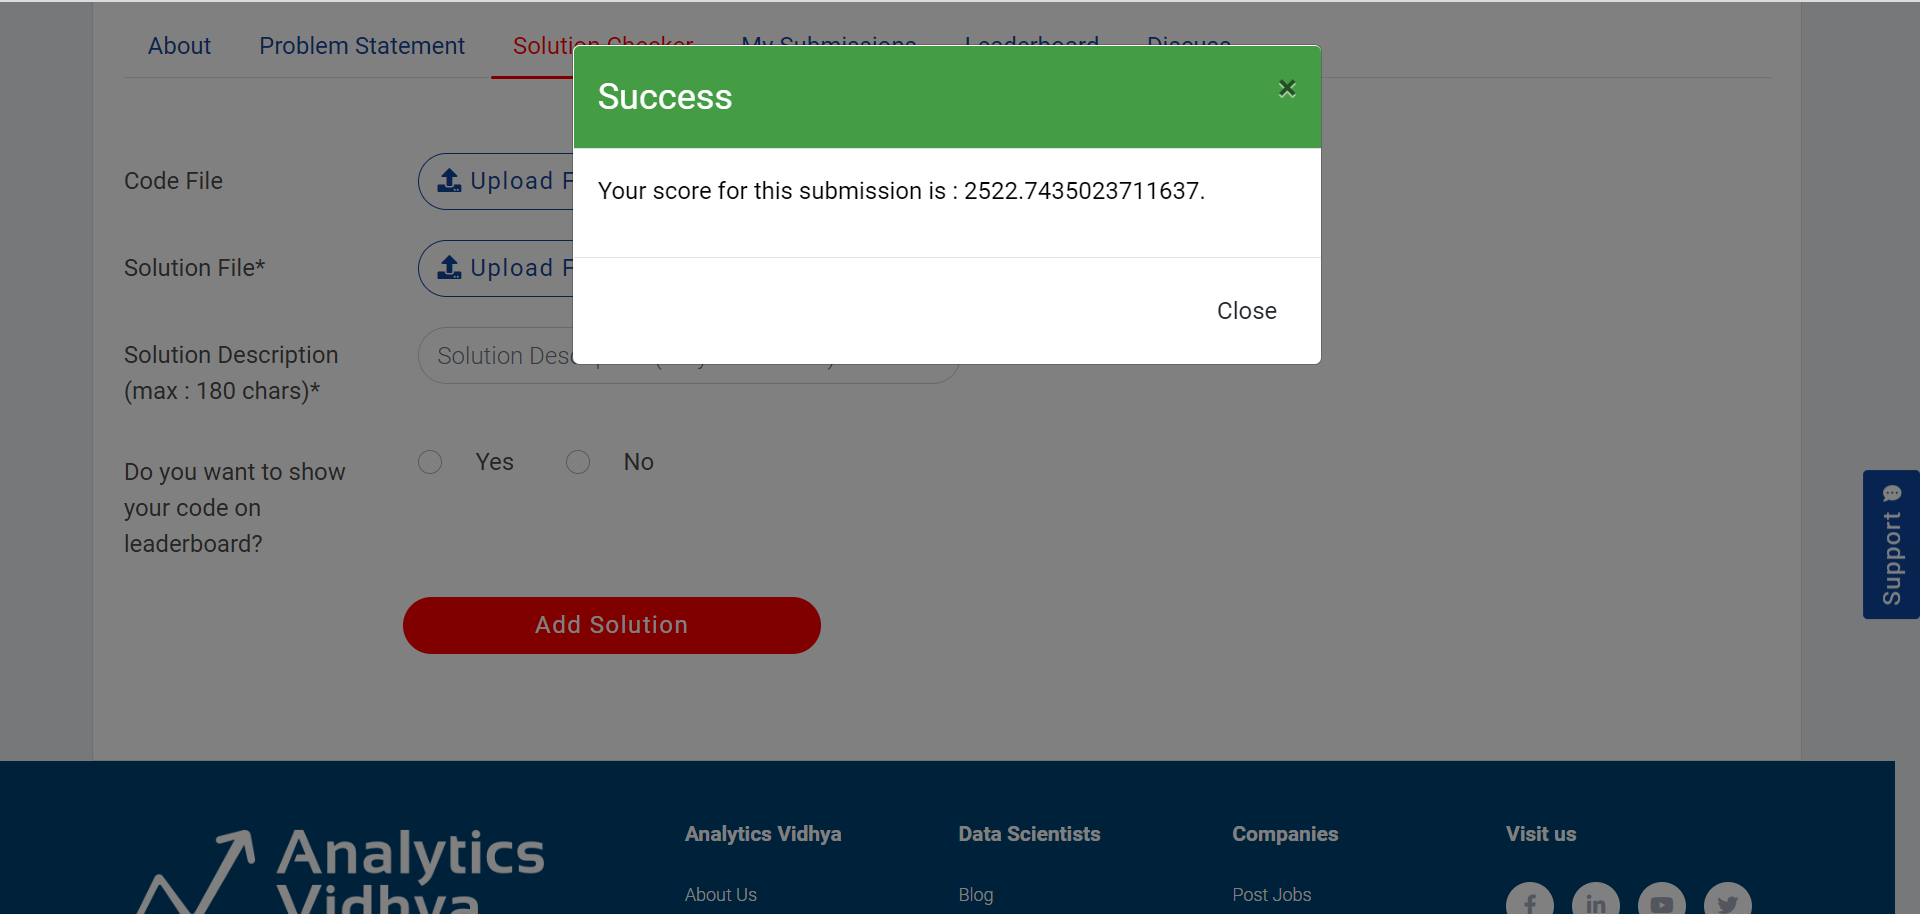